In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [2]:
# Load your dataset (replace 'data.csv' with your actual dataset filename)
data = pd.read_csv('data.csv')
# Display the first few rows to understand the structure
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
# Get a summary of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


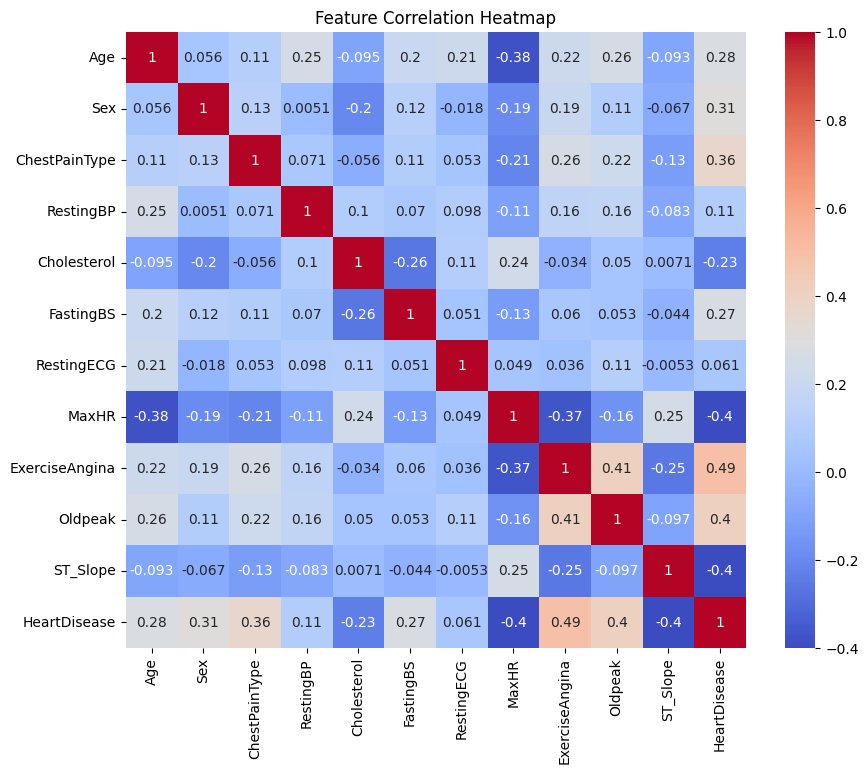

In [5]:
# Handle categorical data encoding
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})  # Encode 'Sex' as 1 for Male, 0 for Female
data['ChestPainType'] = data['ChestPainType'].map({'ATA': 1, 'NAP': 0, 'ASY': 2, 'TA': 3})  # Encode 'ChestPainType'
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})  # Encode 'RestingECG'
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})  # Encode 'ExerciseAngina'
data['ST_Slope'] = data['ST_Slope'].map({'Up': 1, 'Flat': 0, 'Down': 2})  # Encode 'ST_Slope'
data_cleaned = data.loc[:, data.nunique() > 1]
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)
numeric_data = data_encoded.select_dtypes(include=['number'])
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
#data.head()
#data.info()
#data.describe()

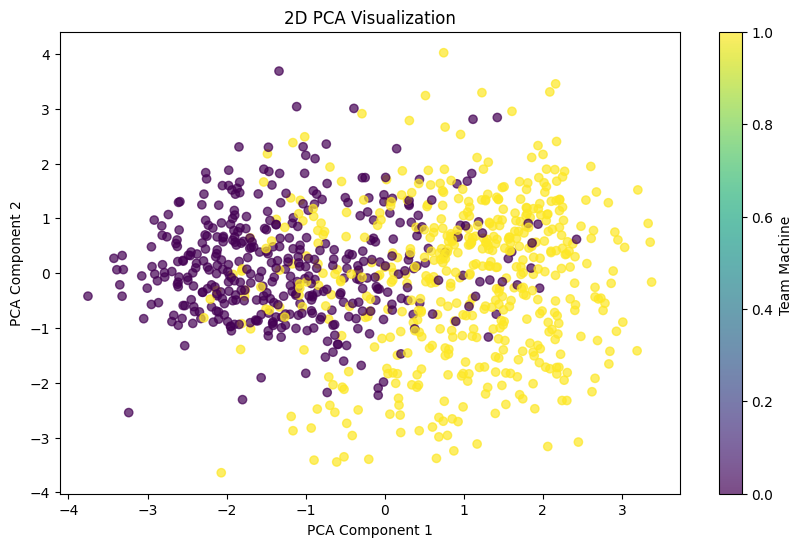

In [6]:
####ppppccccaaaaa
# Standardize the data
features = data.drop(columns=['HeartDisease'])  # Replace 'target' with your dataset's target variable 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['HeartDisease'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization")
plt.colorbar(label='Team Machine ')
plt.show()

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing values (e.g., drop rows with any missing values)
#data = data.dropna()
# Fill missing values (example: using mean)
#This is Second Method
# Fill missing values in numeric columns with their mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
# Fill missing values in categorical columns with their mode (most frequent value)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
# Proceed with the rest of the code

# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [9]:
"""
import pandas as pd

# Assuming 'data' is your DataFrame, and 'numeric_columns' are the columns you want to check for outliers
# Calculate Q1, Q3, and IQR for each numeric column
for col in numeric_columns:
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers by checking which values are outside the bounds
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Print the number of outliers detected in this column
    print(f"Outliers in column '{col}': {len(outliers)}")
    
    # Optionally, remove outliers (uncomment if you want to remove them)
    # data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    # Alternatively, cap outliers instead of removing them (this step is already in your original code)
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# After processing all numeric columns, you can check the resulting dataset size
print(f"Dataset size after handling outliers: {len(data)}")"""


#Alternatively, use Z-score to handle outliers (uncomment if needed)
z_scores = np.abs(zscore(data[numeric_columns]))
threshold = 3  # Common threshold for outlier detection
data_cleaned = data[(z_scores < threshold).all(axis=1)]

# Show the number of rows removed due to outliers
print(f"Original dataset size: {len(data)}")
print(f"Dataset size after removing outliers: {len(data_cleaned)}")
print(f"Number of rows removed: {len(data) - len(data_cleaned)}")

# Use cleaned data after Z-score filtering
data = data_cleaned



Original dataset size: 918
Dataset size after removing outliers: 899
Number of rows removed: 19


In [10]:
print(len(data))

899


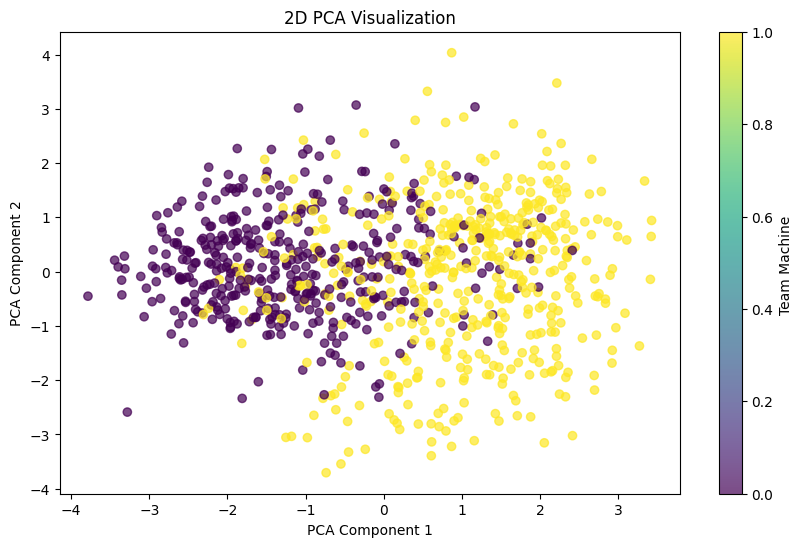

In [11]:
####ppppccccaaaaa
# Standardize the data
features = data.drop(columns=['HeartDisease'])  # Replace 'target' with your dataset's target variable 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['HeartDisease'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization")
plt.colorbar(label='Team Machine ')
plt.show()

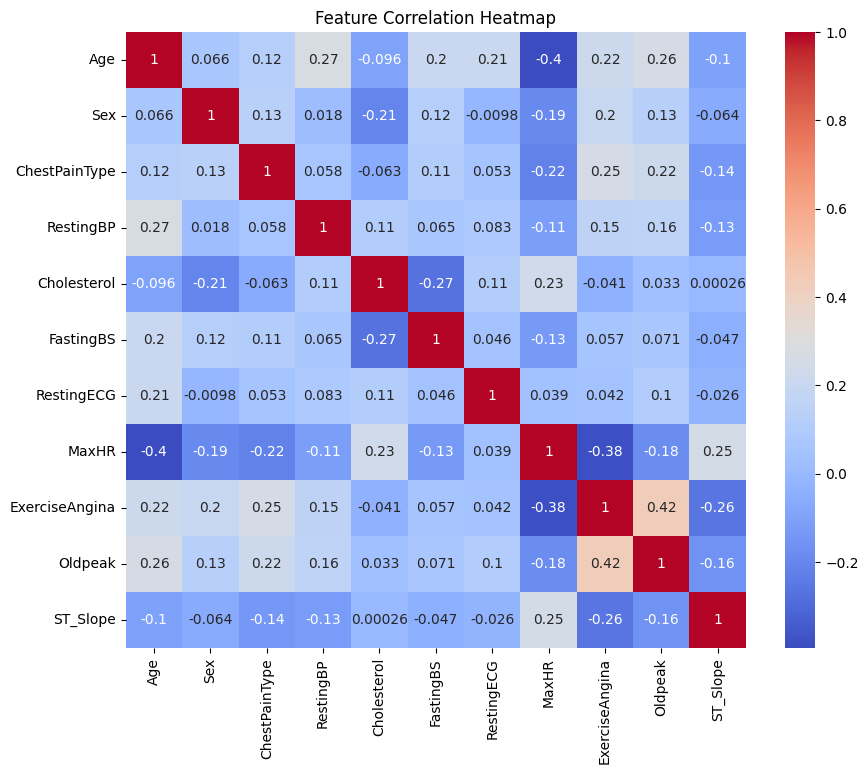

In [12]:
# Calculate the correlation matrix
corr_matrix = features.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Split the dataset into training, validation, and test sets
X = features
y = data['HeartDisease']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=20)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

In [14]:
# Standardize the features before training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the Naive Bayes model
print("=== Naïve Bayes ===")
nb_model = GaussianNB(var_smoothing=1e-9)  # Try adjusting var_smoothing (smaller values)
nb_model.fit(X_train_scaled, y_train)

# Validate the Naïve Bayes model
y_pred_nb_val = nb_model.predict(X_val_scaled)
print("Naïve Bayes Validation Accuracy:", "{:.2f}".format(accuracy_score(y_val, y_pred_nb_val)))
print("Naïve Bayes Validation Performance:")
print(confusion_matrix(y_val, y_pred_nb_val))
print(classification_report(y_val, y_pred_nb_val)) 

=== Naïve Bayes ===
Naïve Bayes Validation Accuracy: 0.88
Naïve Bayes Validation Performance:
[[39  8]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        47
           1       0.83      0.93      0.88        43

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [15]:
# Train the SVM model
print("\n=== Support Vector Machine (SVM) ===")
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Validate the SVM model
y_pred_svm_val = svm_model.predict(X_val_scaled)
print("SVM Validation Accuracy:", "{:.2f}".format(accuracy_score(y_val, y_pred_svm_val)))
print("SVM Validation Performance:")
print(confusion_matrix(y_val, y_pred_svm_val))
print(classification_report(y_val, y_pred_svm_val))


=== Support Vector Machine (SVM) ===
SVM Validation Accuracy: 0.83
SVM Validation Performance:
[[33 14]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        47
           1       0.75      0.98      0.85        43

    accuracy                           0.83        90
   macro avg       0.86      0.84      0.83        90
weighted avg       0.87      0.83      0.83        90



In [16]:
# Evaluate Naïve Bayes on test data
y_pred_nb_test = nb_model.predict(X_test_scaled)
print("Naïve Bayes Test Accuracy:", "{:.2f}".format(accuracy_score(y_test, y_pred_nb_test)))
print("Naïve Bayes Test Performance:")
print(confusion_matrix(y_test, y_pred_nb_test))
print(classification_report(y_test, y_pred_nb_test))

Naïve Bayes Test Accuracy: 0.97
Naïve Bayes Test Performance:
[[39  2]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.96      0.98      0.97        49

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [17]:
# Evaluate SVM on test data
y_pred_svm_test = svm_model.predict(X_test_scaled)
print("SVM Test Accuracy: ", "{:.2f}".format(accuracy_score(y_test, y_pred_svm_test)) )
print("SVM Test Performance:")
print(confusion_matrix(y_test, y_pred_svm_test))
print(classification_report(y_test, y_pred_svm_test))

SVM Test Accuracy:  0.94
SVM Test Performance:
[[37  4]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.92      0.98      0.95        49

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



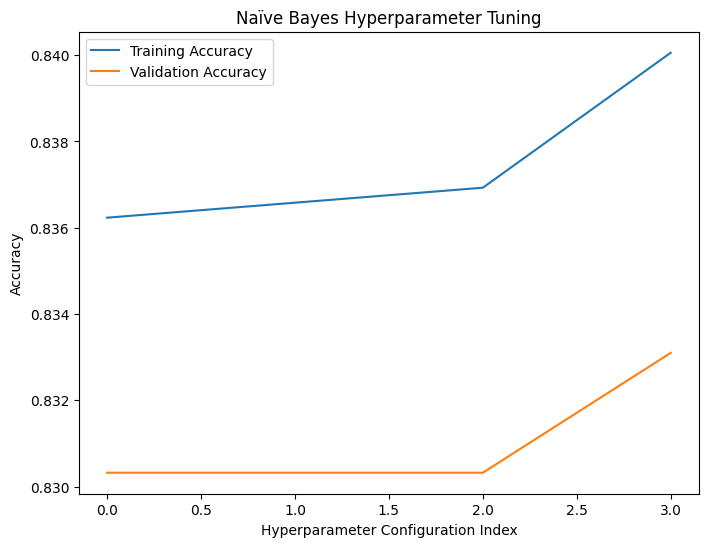

Best parameters for Naïve Bayes: {'var_smoothing': np.float64(1e-06)}
Validation Metrics for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        47
           1       0.82      0.93      0.87        43

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



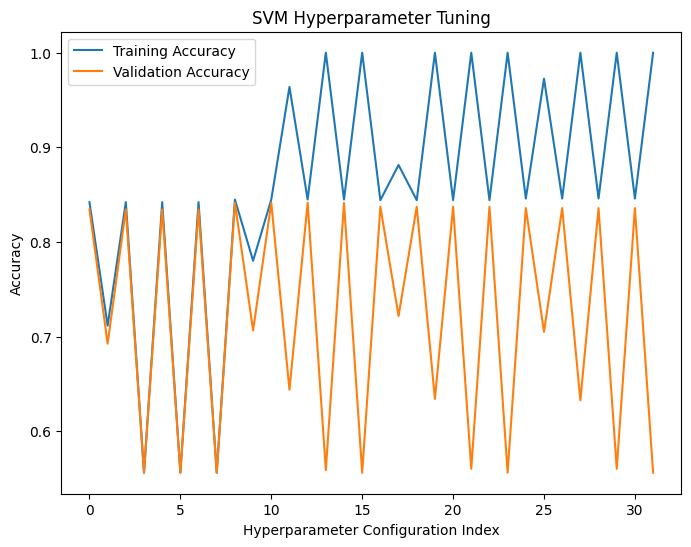

Best parameters for SVM: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Validation Metrics for SVM:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        47
           1       0.77      0.93      0.84        43

    accuracy                           0.83        90
   macro avg       0.85      0.84      0.83        90
weighted avg       0.85      0.83      0.83        90


===============Testing Naïve Bayes:============
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.96      0.98      0.97        49

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



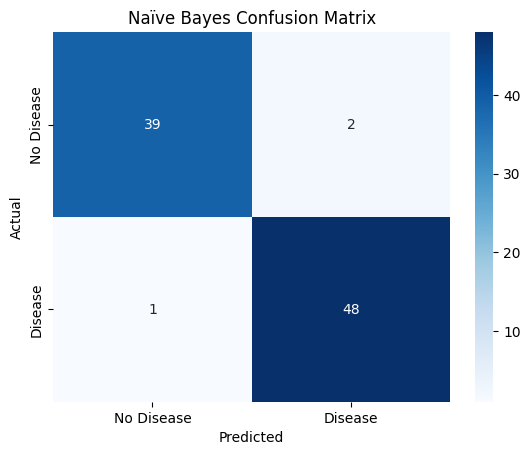


===============Testing SVM:============
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.94      0.96      0.95        49

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90



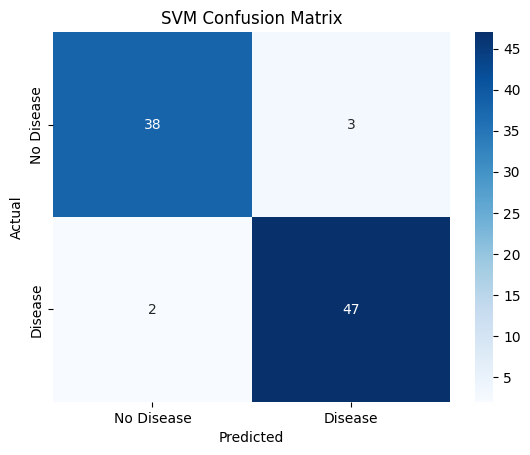

In [18]:
# Step 3: Training Classifiers (Naïve Bayes and SVM)
results = {}

# Naïve Bayes with hyperparameter tuning
param_grid_nb = {'var_smoothing': np.logspace(-9, -6, num=4)}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy', return_train_score=True)
grid_nb.fit(X_train, y_train)

# Plot training and validation accuracy for Naïve Bayes
plt.figure(figsize=(8, 6))
plt.plot(grid_nb.cv_results_['mean_train_score'], label='Training Accuracy')
plt.plot(grid_nb.cv_results_['mean_test_score'], label='Validation Accuracy')
plt.xlabel('Hyperparameter Configuration Index')
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Hyperparameter Tuning')
plt.legend()
plt.show()

print("Best parameters for Naïve Bayes:", grid_nb.best_params_)
y_pred_val_nb = grid_nb.predict(X_val)
print("Validation Metrics for Naïve Bayes:")
print(classification_report(y_val, y_pred_val_nb))
results['Naïve Bayes'] = grid_nb.best_estimator_

# SVM with hyperparameter tuning
svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', return_train_score=True)
grid_svc.fit(X_train, y_train)

# Plot training and validation accuracy for SVM
plt.figure(figsize=(8, 6))
plt.plot(grid_svc.cv_results_['mean_train_score'], label='Training Accuracy')
plt.plot(grid_svc.cv_results_['mean_test_score'], label='Validation Accuracy')
plt.xlabel('Hyperparameter Configuration Index')
plt.ylabel('Accuracy')
plt.title('SVM Hyperparameter Tuning')
plt.legend()
plt.show()

print("Best parameters for SVM:", grid_svc.best_params_)
y_pred_val_svc = grid_svc.predict(X_val)
print("Validation Metrics for SVM:")
print(classification_report(y_val, y_pred_val_svc))
results['SVM'] = grid_svc.best_estimator_

# Step 4: Testing
for name, model in results.items():
    print(f"\n===============Testing {name}:============")
    y_pred_test = model.predict(X_test)
    print(classification_report(y_test, y_pred_test))
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()